# Import relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debna\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\debna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Get the data

In [2]:
dataset = pd.read_csv("mbti_1.csv")
dataset.sample(5)

,type,posts
1711,ENFP,"'Death before dishonor In view, a humble va..."
5793,INTP,"'Take Shelter (Jeff Nichols, 2011) The Devil's..."
7109,ENTP,"'Considering the average score is 58, assuming..."
1036,INTJ,'Great. Now my day is ruined. Someone just une...
2209,INTP,"'you know, i can see your point... F types wou..."


In [3]:
#data = pd.get_dummies(data=dataset, prefix='', prefix_sep='', columns=['type'])
data = dataset
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
data['I-E'] = data['type'].astype(str).str[0]
data['I-E'] = data['I-E'].map(map1)
data['N-S'] = data['type'].astype(str).str[1]
data['N-S'] = data['N-S'].map(map2)
data['T-F'] = data['type'].astype(str).str[2]
data['T-F'] = data['T-F'].map(map3)
data['J-P'] = data['type'].astype(str).str[3]
data['J-P'] = data['J-P'].map(map4)
data.sample(5)

,type,posts,I-E,N-S,T-F,J-P
3006,INFJ,"'deal all, I guess there are many threads with...",0,0,1,0
7566,ISFP,They live in Stonypoint?|||I can't remember ha...,0,1,1,1
1492,INFP,"'well-rounded funny INFP from Austin, TX 27th...",0,0,1,1
4813,ENTP,"'Wait, what? You're looking for traits of an a...",1,0,0,1
4917,INFJ,"'Hi @Fathom , I am sorry you are feeling str...",0,0,1,0


In [4]:
data.duplicated().sum()

0

# EDA

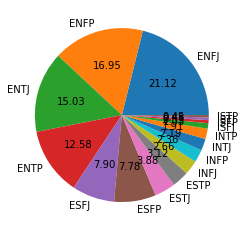

In [5]:
plt.pie(dataset['type'].value_counts(), labels=np.unique(np.array(dataset['type'])), autopct="%0.2f")
plt.show()

In [6]:
def split_join(s, delimiter):
    t = s.split(delimiter)
    return " ".join(t)

In [7]:
data['posts'] = data['posts'].apply(lambda x: split_join(x,'|||'))

In [8]:
data['num_words'] = data['posts'].apply(lambda x:len(nltk.word_tokenize(x)))
data['num_sentences'] = data['posts'].apply(lambda x:len(nltk.sent_tokenize(x)))

# Data Preprocessing
1. lower case
2. tokenization
3. removing special characters
4. removing stop words
5. stemming

In [7]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

def transform_text(text):

    ps = PorterStemmer()

    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [13]:
data['transformed_posts'] = data['posts'].apply(transform_text)

In [14]:
data.head()

,type,posts,I-E,N-S,T-F,J-P,num_words,num_sentences,transformed_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw ht...,0,0,1,0,790,44,http enfp intj moment http sportscent top ten ...
1,ENTP,'I'm finding the lack of me in these posts ver...,1,0,0,1,1466,107,find lack post alarm sex bore posit often exam...
2,INTP,'Good one _____ https://www.youtube.com/wat...,0,0,0,1,1067,60,one http cours say know bless curs absolut pos...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",0,0,0,0,1350,99,intp enjoy convers day esoter gab natur univer...
4,ENTJ,'You're fired. That's another silly misconcept...,1,0,0,0,1211,93,fire anoth silli misconcept approach logic go ...


In [4]:
df = pd.read_csv('feature_set.csv')

In [9]:
df.head()

,Unnamed: 0,transformed_posts,num_words,num_sentences,http_per_comment,words_per_comment,emoticons_per_comment,ttr,nrc_emotion,nrc_vad
0,0,http enfp intj moment http sportscent top ten ...,790,44,0.48,12.10,0,0.090250,9.375,0
1,1,find lack post alarm sex bore posit often exam...,1466,107,0.20,24.38,0,0.089432,17.750,1
2,2,one http cours say know bless curs absolut pos...,1067,60,0.10,17.70,0,0.103735,17.125,1
3,3,intp enjoy convers day esoter gab natur univer...,1350,99,0.04,22.26,0,0.096549,9.625,0
4,4,fire anoth silli misconcept approach logic go ...,1211,93,0.12,20.32,0,0.092466,20.125,0


In [22]:
df.drop('Unnamed: 0',axis=1,inplace = True)

In [23]:
df.head()

,transformed_posts,num_words,num_sentences,http_per_comment,words_per_comment,emoticons_per_comment,ttr,nrc_emotion,nrc_vad
0,http enfp intj moment http sportscent top ten ...,790,44,0.48,12.10,0,0.090250,9.375,0
1,find lack post alarm sex bore posit often exam...,1466,107,0.20,24.38,0,0.089432,17.750,1
2,one http cours say know bless curs absolut pos...,1067,60,0.10,17.70,0,0.103735,17.125,1
3,intp enjoy convers day esoter gab natur univer...,1350,99,0.04,22.26,0,0.096549,9.625,0
4,fire anoth silli misconcept approach logic go ...,1211,93,0.12,20.32,0,0.092466,20.125,0


In [24]:
list(df.columns)

['transformed_posts',
 'num_words',
 'num_sentences',
 'http_per_comment',
 'words_per_comment',
 'emoticons_per_comment',
 'ttr',
 'nrc_emotion',
 'nrc_vad']